In [99]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [100]:
%matplotlib inline

## K -means con cielab

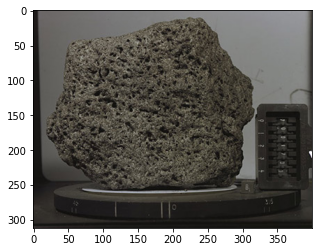

(312, 400, 3)

In [109]:
img = cv.imread('./material_TPs/TP5/roca_lunar_2.jpg')
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.show()
imgRGB.shape

In [174]:
lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
lab_1 = cv.copyMakeBorder(lab, 1, 1, 1, 1, 1, cv.BORDER_CONSTANT, (0,0,0))
lab_1.shape

(314, 402, 3)

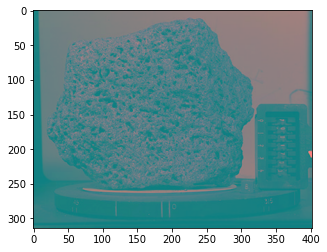

In [103]:
plt.figure()
plt.imshow(lab_1)
plt.show()

### Espacios de características

#### Espacio características color

In [118]:
features_color = lab_1.reshape((-1,3))
features_color = np.float32(features_color)
features_color.shape

(126228, 3)

##### Espacio características color + posición

In [105]:
# obtener posiciones
pos = []

for j in range(0, 314):
    for i in range(0, 402):
        pos.append((j,i))

pos= np.asarray(pos)

#obtener color
features_color = lab_1.reshape((-1,3))

#features finales
features_pos = np.concatenate((features_color, pos), axis=1)
features_pos = np.float32(features_pos)
features_pos.shape

(126228, 5)

### gráficas de distribuciones

#### Espacio de características de color

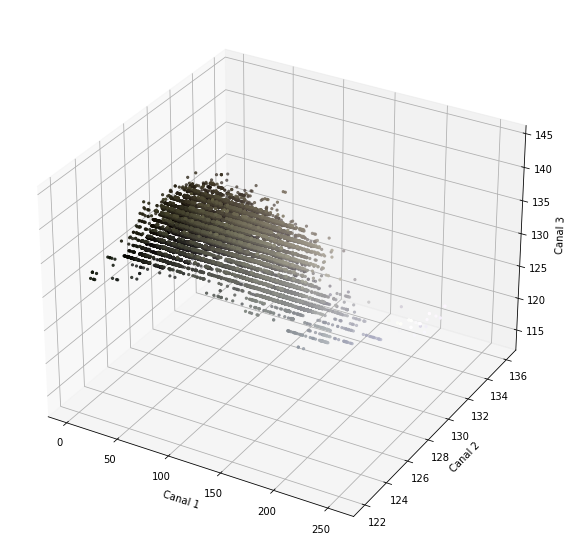

In [106]:
l, a, b = cv.split(lab_1)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

imgRGB = cv.copyMakeBorder(imgRGB, 1, 1, 1, 1, 1, cv.BORDER_CONSTANT, (0,0,0))
pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(l.flatten(), a.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()


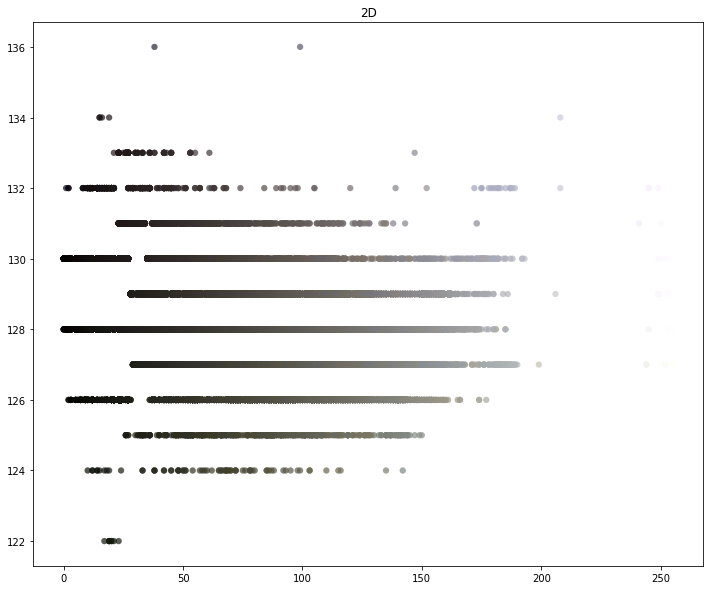

In [113]:
plt.figure(figsize=(12,10))
plt.scatter(l.flatten(), a.flatten(), c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

#### Espacio de características color + pos

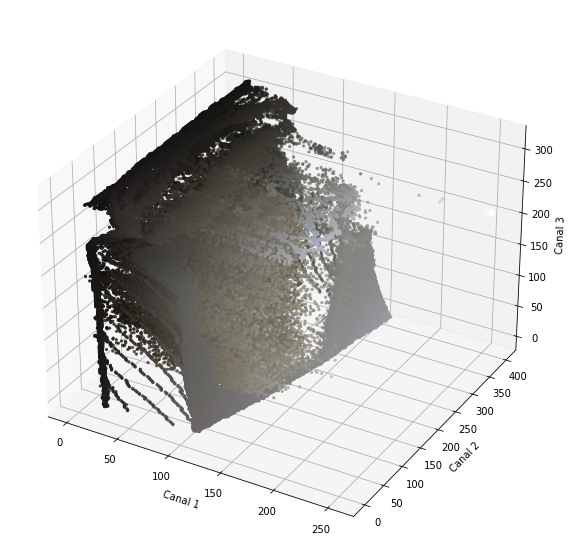

In [110]:
l, a, b = cv.split(lab_1)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

imgRGB = cv.copyMakeBorder(imgRGB, 1, 1, 1, 1, 1, cv.BORDER_CONSTANT, (0,0,0))
pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(l.flatten(), features_pos[:,4], features_pos[:,3], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

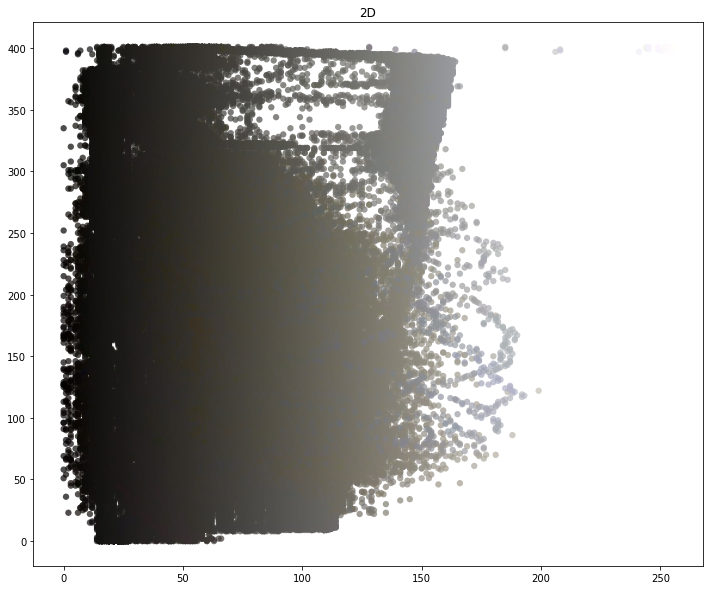

In [112]:
plt.figure(figsize=(12,10))
plt.scatter(l.flatten(),features_pos[:,4], c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

Es difícil identificar si hay un cluster específico para la roca porque el fondo y los otros objetos están dentro de los mismo tonos y no tienen una distribución reconocible.

### Posterización

#### Espacio de características color

In [274]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 3
compact, label, color_clusters = cv.kmeans(features_color, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [275]:
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[134 127 129]
 [ 80 127 134]
 [ 31 128 130]] 

Compactación: 
 41 



array([[2],
       [2],
       [2],
       [2]], dtype=int32)

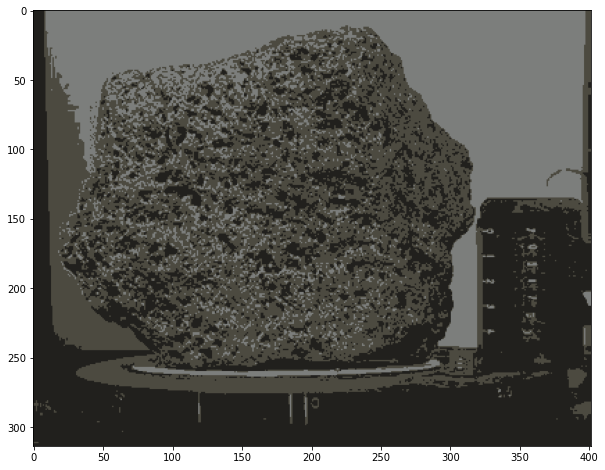

(314, 402, 3)

In [276]:
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((lab_1.shape))

img_rgb = cv.cvtColor(img_out,cv.COLOR_Lab2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

img_out.shape

In [267]:
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape[:2],'uint8')
    mask[np.where((img_out == cluster).all(axis=2))] = 255
    mask_list.append(mask)

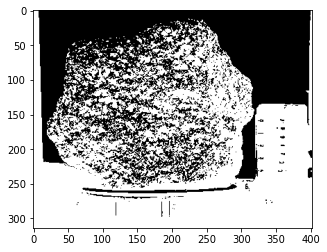

In [277]:
for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(lab_1, lab_1, mask = mask)
    plt.imshow(mask, cmap=plt.cm.gray)

#### Espacio de características color + pos

In [271]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 30
compact, label, color_clusters = cv.kmeans(features_pos, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [272]:
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[136 127 129 206  54]
 [ 53 128 132 212 110]
 [138 127 129 101  97]
 [146 127 127  33  37]
 [ 40 128 131 170  34]
 [ 35 128 132 108 124]
 [ 31 128 130  26 226]
 [101 128 134  29 212]
 [100 127 133 230 156]
 [ 84 128 135  87 174]
 [ 49 127 132 238  28]
 [ 60 128 134 155 198]
 [127 128 130  25 133]
 [ 27 128 129  67   8]
 [ 34 127 130  24 111]
 [ 75 128 131 222  50]
 [ 35 128 129  18  25]
 [ 43 127 130 157 109]
 [114 128 129  33  45]
 [145 127 127  34 110]
 [ 84 127 135 213 226]
 [ 33 128 130  26 161]
 [ 59 127 134 149  25]
 [ 96 127 134 156 118]
 [ 36 127 130 218 105]
 [100 127 132 119  38]
 [ 95 128 134  79  94]
 [ 22 128 129  36  42]
 [ 63 128 134  84 250]
 [ 35 128 129  29  92]] 

Compactación: 
 14 



array([[13],
       [13],
       [13],
       [13]], dtype=int32)

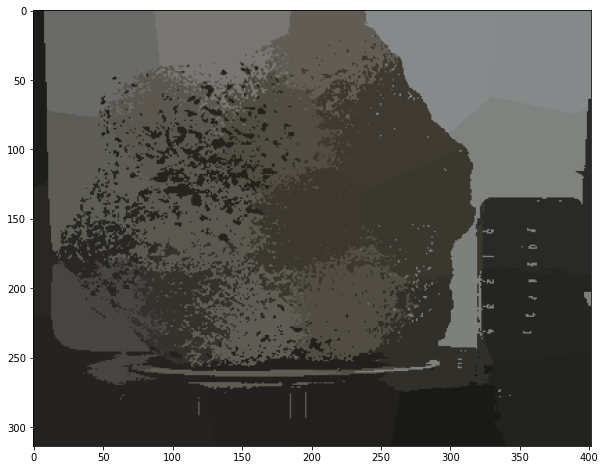

In [273]:
img_out_2 = color_clusters[label.flatten()]
img_out_2 = img_out_2[:,:3].reshape((lab_1.shape))


img_rgb = cv.cvtColor(img_out_2,cv.COLOR_Lab2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

In [269]:
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape[:2],'uint8')
    mask[np.where((img_out == cluster).all(axis=2))] = 255
    mask_list.append(mask)

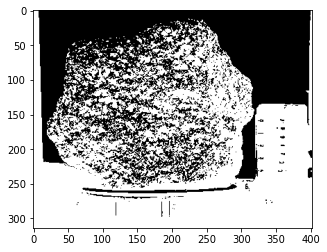

In [278]:
for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(lab_1, lab_1, mask = mask)
    plt.imshow(mask,cmap=plt.cm.gray)

### Prueba con Mean Shift

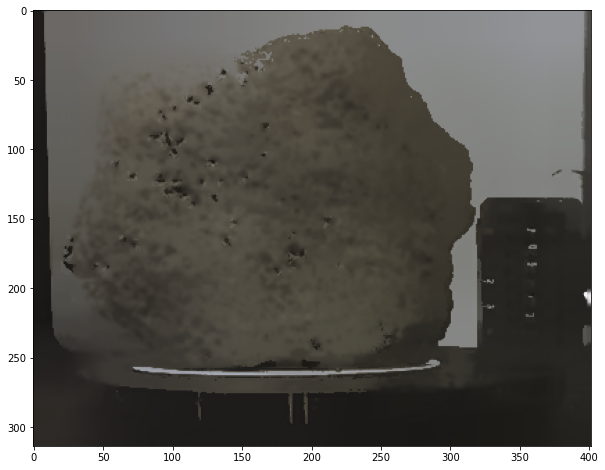

In [239]:
sp = 20
sr = 40

img_out_3=cv.pyrMeanShiftFiltering(imgRGB, sp, sr)

plt.figure(figsize=(10,10))
plt.imshow(img_out_3)


### Conclusiones

Pareciera que para esta imagen resultaría mejor usar algún otro espacio de características que no sea color. Podría usarse lbp dada la textura de la roca o probar algún otro espacio como HSV para ver si la distribución es paramétrica que ayude a la clusterización. 